# T20 WORLD_CUP WINNER PREDICTION 2026

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as pltticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [2]:
world_cup=pd.read_excel(r"T20 worldcup overall.xlsx")
results=pd.read_excel(r"matchresultupdate2.xlsx")

In [3]:
world_cup.head(20)

,Team,group,apperance,Title,Finals,Semi finals,Current ranking
0,India,A,8,1.0,2.0,4.0,1.0
1,Pakistan,A,8,1.0,3.0,6.0,5.0
2,Ireland,A,7,0.0,0.0,0.0,11.0
3,Canada,A,0,0.0,0.0,0.0,20.0
4,United States,A,0,0.0,0.0,0.0,19.0
5,England,B,8,2.0,3.0,4.0,2.0
6,Australia,B,8,1.0,2.0,4.0,3.0
7,Namibia,B,2,0.0,0.0,0.0,14.0
8,Scotland,B,5,0.0,0.0,0.0,13.0
9,Oman,B,2,0.0,0.0,0.0,18.0


In [4]:
results.head()

,Team,Result,Margin,BR,Toss,Bat,winner,Opposition,Ground,Start Date
0,India,won,14 runs,NaN,lost,1st,India,South Africa,Gros Islet,2010-05-02
1,South Africa,won,59 runs,NaN,lost,1st,South Africa,Afghanistan,Bridgetown,2010-05-05
2,Australia,won,49 runs,NaN,lost,1st,Australia,India,Bridgetown,2010-05-07
3,New Zealand,won,1 runs,NaN,lost,1st,New Zealand,Pakistan,Bridgetown,2010-05-08
4,West Indies,won,14 runs,NaN,lost,1st,West Indies,India,Bridgetown,2010-05-09


In [5]:
df=results[(results["Team"]=="Sri Lanka")|(results["Opposition"]=="Sri Lanka")]
Sri_Lanka=df.iloc[:]
Sri_Lanka.head()

,Team,Result,Margin,BR,Toss,Bat,winner,Opposition,Ground,Start Date
9,Sri Lanka,won,35 runs,NaN,lost,1st,Sri Lanka,Australia,Pallekele,2011-08-06
26,Sri Lanka,won,19 runs,NaN,lost,1st,Sri Lanka,England,Pallekele,2012-10-01
30,Sri Lanka,won,2 runs,NaN,lost,1st,Sri Lanka,Australia,Melbourne,2013-01-28
33,Sri Lanka,won,17 runs,NaN,lost,1st,Sri Lanka,Bangladesh,Pallekele,2013-03-31
40,Sri Lanka,won,24 runs,NaN,lost,1st,Sri Lanka,Pakistan,Dubai (DICS),2013-12-13


# create a column for 2010 matches for references

In [6]:

year=[]
for row in Sri_Lanka["Start Date"]:
    year.append(int(row.year))
Sri_Lanka["match_year"]= year
Srilanka2010=Sri_Lanka[Sri_Lanka.match_year>=2010]
Srilanka2010.count()

Team          151
Result        151
Margin        151
BR             81
Toss          151
Bat           151
winner        151
Opposition    151
Ground        151
Start Date    151
match_year    151
dtype: int64

In [7]:
#combine the team participating in the world cup
worldcup_teams = ['India','Pakistan','Ireland','Canada','U.S.A.',
                  'England','Australia','Namibia','Scotland',
                  'Oman','New Zealand','West Indies','Afghanistan',
                  'Uganda','P.N.G.','South Africa','Sri Lanka',
                  'Bangladesh','Netherlands','Nepal']
df_team1=results[results['Team'].isin(worldcup_teams)]
df_team2=results['Opposition'].isin(worldcup_teams)
df_team=pd.concat((df_team1,df_team2))
df_team.drop_duplicates()
df_team.count()

Team          1856
Result        1856
Margin        1856
BR             894
Toss          1856
Bat           1856
winner        1856
Opposition    3712
Ground        1856
Start Date    1856
dtype: int64

In [8]:
df_team.head()

,Team,Result,Margin,BR,Toss,Bat,winner,Opposition,Ground,Start Date
0,India,won,14 runs,NaN,lost,1st,India,South Africa,Gros Islet,2010-05-02
1,South Africa,won,59 runs,NaN,lost,1st,South Africa,Afghanistan,Bridgetown,2010-05-05
2,Australia,won,49 runs,NaN,lost,1st,Australia,India,Bridgetown,2010-05-07
3,New Zealand,won,1 runs,NaN,lost,1st,New Zealand,Pakistan,Bridgetown,2010-05-08
4,West Indies,won,14 runs,NaN,lost,1st,West Indies,India,Bridgetown,2010-05-09


In [9]:
df_team.isna().sum()

Team          1856
Result        1856
Margin        1856
BR            2818
Toss          1856
Bat           1856
winner        1856
Opposition       0
Ground        1856
Start Date    1856
dtype: int64

In [10]:
df_new = df_team.drop([0], axis=0)

df_new = df_new.drop(["BR"], axis=1)

df_new.count()

Team          1855
Result        1855
Margin        1855
Toss          1855
Bat           1855
winner        1855
Opposition    3710
Ground        1855
Start Date    1855
dtype: int64

In [11]:
df_new = df_new.dropna()
df_new.count()

Team          1855
Result        1855
Margin        1855
Toss          1855
Bat           1855
winner        1855
Opposition    1855
Ground        1855
Start Date    1855
dtype: int64

In [12]:
df_team = df_new

In [13]:
df_team_2010=df_team.drop(['Start Date','Margin','Ground','Toss','Bat','Result'],axis=1)
df_team_2010.head(1856)

,Team,winner,Opposition
1,South Africa,South Africa,Afghanistan
2,Australia,Australia,India
3,New Zealand,New Zealand,Pakistan
4,West Indies,West Indies,India
5,South Africa,South Africa,West Indies
...,...,...,...
1851,Afghanistan,India,India
1852,Afghanistan,India,India
1853,New Zealand,Australia,Australia
1854,Netherlands,Nepal,Nepal


In [14]:
df_team_2010.count()

Team          1855
winner        1855
Opposition    1855
dtype: int64

In [15]:

df_team_2010=df_team_2010.reset_index(drop=True)
df_team_2010.loc[df_team_2010.winner==df_team_2010.Team,'winning_team']=1
df_team_2010.loc[df_team_2010.winner==df_team_2010.Opposition,'winning_team']=2
df_team_2010=df_team_2010.drop(['winning_team'],axis=1)
df_team_2010.head(1856)

,Team,winner,Opposition
0,South Africa,South Africa,Afghanistan
1,Australia,Australia,India
2,New Zealand,New Zealand,Pakistan
3,West Indies,West Indies,India
4,South Africa,South Africa,West Indies
...,...,...,...
1850,Afghanistan,India,India
1851,Afghanistan,India,India
1852,New Zealand,Australia,Australia
1853,Netherlands,Nepal,Nepal


In [16]:
final = pd.get_dummies(df_team_2010, prefix=['Team', 'Opposition'], columns=['Team', 'Opposition'])


x=final.drop(['winner'],axis=1)
y=final['winner']


x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [17]:
final.head()

,winner,Team_Afghanistan,Team_Australia,Team_Bangladesh,Team_Canada,Team_England,Team_India,Team_Ireland,Team_Namibia,Team_Nepal,...,Opposition_ New Zealand,Opposition_ Oman,Opposition_ P.N.G.,Opposition_ Pakistan,Opposition_ Scotland,Opposition_ South Africa,Opposition_ Sri Lanka,Opposition_ U.S.A.,Opposition_ Uganda,Opposition_ West Indies
0,South Africa,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Australia,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,New Zealand,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,West Indies,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,South Africa,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [18]:
y.unique()

array(['South Africa', 'Australia', 'New Zealand', 'West Indies', 'India',
       'Sri Lanka', 'Pakistan', 'Bangladesh', 'England', 'Ireland',
       'Scotland', 'Nepal', 'Netherlands', 'Afghanistan', 'Canada',
       'Oman', 'Namibia', 'P.N.G.', 'U.S.A.', ' Australia',
       ' New Zealand', ' Afghanistan', ' India', ' West Indies',
       ' Pakistan', ' South Africa', ' Sri Lanka', ' England',
       ' Netherlands', ' Ireland', ' Bangladesh', ' Scotland', ' P.N.G.',
       ' Namibia', ' Canada', ' U.S.A.', ' Oman', ' Nepal', 'Uganda',
       ' Uganda'], dtype=object)

In [19]:
x.tail()

,Team_Afghanistan,Team_Australia,Team_Bangladesh,Team_Canada,Team_England,Team_India,Team_Ireland,Team_Namibia,Team_Nepal,Team_Netherlands,...,Opposition_ New Zealand,Opposition_ Oman,Opposition_ P.N.G.,Opposition_ Pakistan,Opposition_ Scotland,Opposition_ South Africa,Opposition_ Sri Lanka,Opposition_ U.S.A.,Opposition_ Uganda,Opposition_ West Indies
1850,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1851,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1852,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1853,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1854,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [20]:
x.columns


Index(['Team_Afghanistan', 'Team_Australia', 'Team_Bangladesh', 'Team_Canada',
       'Team_England', 'Team_India', 'Team_Ireland', 'Team_Namibia',
       'Team_Nepal', 'Team_Netherlands', 'Team_New Zealand', 'Team_Oman',
       'Team_P.N.G.', 'Team_Pakistan', 'Team_Scotland', 'Team_South Africa',
       'Team_Sri Lanka', 'Team_U.S.A.', 'Team_Uganda', 'Team_West Indies',
       'Opposition_ Afghanistan', 'Opposition_ Australia',
       'Opposition_ Bangladesh', 'Opposition_ Canada', 'Opposition_ England',
       'Opposition_ India', 'Opposition_ Ireland', 'Opposition_ Namibia',
       'Opposition_ Nepal', 'Opposition_ Netherlands',
       'Opposition_ New Zealand', 'Opposition_ Oman', 'Opposition_ P.N.G.',
       'Opposition_ Pakistan', 'Opposition_ Scotland',
       'Opposition_ South Africa', 'Opposition_ Sri Lanka',
       'Opposition_ U.S.A.', 'Opposition_ Uganda', 'Opposition_ West Indies'],
      dtype='object')

In [21]:
y.tail()

1850         India
1851         India
1852     Australia
1853         Nepal
1854        U.S.A.
Name: winner, dtype: object

In [22]:
y_train.head()

1732        Namibia
787           India
208     New Zealand
1283          Nepal
1452      Australia
Name: winner, dtype: object

In [23]:
#final = final.drop(columns=0)
final.head()

,winner,Team_Afghanistan,Team_Australia,Team_Bangladesh,Team_Canada,Team_England,Team_India,Team_Ireland,Team_Namibia,Team_Nepal,...,Opposition_ New Zealand,Opposition_ Oman,Opposition_ P.N.G.,Opposition_ Pakistan,Opposition_ Scotland,Opposition_ South Africa,Opposition_ Sri Lanka,Opposition_ U.S.A.,Opposition_ Uganda,Opposition_ West Indies
0,South Africa,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Australia,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,New Zealand,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,West Indies,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,South Africa,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [24]:
#logistic regression

logreg=LogisticRegression()
logreg.fit(x_train,y_train)


score=logreg.score(x_train,y_train)
score2=logreg.score(x_test,y_test)

print("training acuracy:",'%.3f'%(score))
print("test accuracy:",'%.3f'%(score2))

training acuracy: 0.678
test accuracy: 0.609


In [25]:
f1 = x_test.iloc[6:8]
f1

,Team_Afghanistan,Team_Australia,Team_Bangladesh,Team_Canada,Team_England,Team_India,Team_Ireland,Team_Namibia,Team_Nepal,Team_Netherlands,...,Opposition_ New Zealand,Opposition_ Oman,Opposition_ P.N.G.,Opposition_ Pakistan,Opposition_ Scotland,Opposition_ South Africa,Opposition_ Sri Lanka,Opposition_ U.S.A.,Opposition_ Uganda,Opposition_ West Indies
1527,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1223,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
f1.columns

Index(['Team_Afghanistan', 'Team_Australia', 'Team_Bangladesh', 'Team_Canada',
       'Team_England', 'Team_India', 'Team_Ireland', 'Team_Namibia',
       'Team_Nepal', 'Team_Netherlands', 'Team_New Zealand', 'Team_Oman',
       'Team_P.N.G.', 'Team_Pakistan', 'Team_Scotland', 'Team_South Africa',
       'Team_Sri Lanka', 'Team_U.S.A.', 'Team_Uganda', 'Team_West Indies',
       'Opposition_ Afghanistan', 'Opposition_ Australia',
       'Opposition_ Bangladesh', 'Opposition_ Canada', 'Opposition_ England',
       'Opposition_ India', 'Opposition_ Ireland', 'Opposition_ Namibia',
       'Opposition_ Nepal', 'Opposition_ Netherlands',
       'Opposition_ New Zealand', 'Opposition_ Oman', 'Opposition_ P.N.G.',
       'Opposition_ Pakistan', 'Opposition_ Scotland',
       'Opposition_ South Africa', 'Opposition_ Sri Lanka',
       'Opposition_ U.S.A.', 'Opposition_ Uganda', 'Opposition_ West Indies'],
      dtype='object')

In [27]:
# results
pred = logreg.predict(f1)
pred

array([' India', 'West Indies'], dtype=object)

In [28]:
#18
#adding the ICC rankings
#the team which positiones in higher on the ICC rankings will considered 'favourite'for the match
#and will be positioned under the 'team'column
#loading new dtaset
ranking=pd.read_excel(r"ICC Rankings.xlsx")
fixture=pd.read_excel(r"match shcedule.xlsx")
#list for storing the group stage games
pred_set=[]



In [29]:
fixture.head(46)

,Match No,Team,Opposition,Date,Venue
0,1,U.S.A,Canada,"Sat, 1 June",Dallas
1,2,West Indies,P.N.G,"Sun, 2 June",Guyana
2,3,Namibia,Oman,"Sun, 2 June",Barbados
3,4,Sri Lanka,South africa,"Mon, 3 June",New York
4,5,Afghanistan,Uganda,"Mon, 3 June",Guyana
5,6,England,Scotland,"Tue, 4 June",Barbados
6,7,Netherlands,Nepal,"Tue, 4 June",Dallas
7,8,India,Ireland,"Wed, 5 June",New York
8,9,P.N.G,Uganda,"Wed, 5 June",Guyana
9,10,Australia,Oman,"Wed, 5 June",Barbados


In [30]:
# Create new columns with ranking position of each team

fixture.insert(1, 'first_position', fixture['Team'].map(ranking.set_index('Team')['Position']))
fixture.insert(2, 'second_position', fixture['Opposition'].map(ranking.set_index('Team')['Position']))

# We only need the group stage games, so slice the dataset and display the last 5 rows

fixture = fixture.iloc[:45, :]
fixture.tail()

,Match No,first_position,second_position,Team,Opposition,Date,Venue
35,36,5.0,11.0,Pakistan,Ireland,"Sun, 16 June",Florida
36,37,9.0,16.0,Bangladesh,Nepal,"Sun, 16 June",St. Vincent
37,38,8.0,15.0,Sri Lanka,Netherlands,"Sun, 16 June",St. Lucia
38,39,4.0,20.0,New Zealand,P.N.G,"Mon, 17 June",Trinidad
39,40,7.0,10.0,West Indies,Afghanistan,"Mon, 17 June",St. Lucia


In [31]:

for index, row in fixture.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set.append({'Team': row['Team'], 'Opposition': row['Opposition'], 'winning_team': None})
    else:
        pred_set.append({'Team': row['Opposition'], 'Opposition': row['Team'], 'winning_team': None})
        
pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set
pred_set.head()

,Team,Opposition,winning_team
0,Canada,U.S.A,None
1,West Indies,P.N.G,None
2,Namibia,Oman,None
3,South africa,Sri Lanka,None
4,Afghanistan,Uganda,None


In [32]:

pred_set = pd.get_dummies(pred_set, prefix=['Team', 'Opposition'], columns=['Team', 'Opposition'])


missing_cols = set(final.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]


pred_set = pred_set.drop(['winner'], axis=1)
pred_set.head()

,Team_Afghanistan,Team_Australia,Team_Bangladesh,Team_Canada,Team_England,Team_India,Team_Ireland,Team_Namibia,Team_Nepal,Team_Netherlands,...,Opposition_ New Zealand,Opposition_ Oman,Opposition_ P.N.G.,Opposition_ Pakistan,Opposition_ Scotland,Opposition_ South Africa,Opposition_ Sri Lanka,Opposition_ U.S.A.,Opposition_ Uganda,Opposition_ West Indies
0,False,False,False,True,False,False,False,False,0,False,...,0,0,0,0,0,0,0,0,0,0
1,False,False,False,False,False,False,False,False,0,False,...,0,0,0,0,0,0,0,0,0,0
2,False,False,False,False,False,False,False,True,0,False,...,0,0,0,0,0,0,0,0,0,0
3,False,False,False,False,False,False,False,False,0,False,...,0,0,0,0,0,0,0,0,0,0
4,True,False,False,False,False,False,False,False,0,False,...,0,0,0,0,0,0,0,0,0,0


In [33]:
predictions = logreg.predict(pred_set)
for i in range(fixture.shape[0]):
    print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
    if predictions[i] == 1:
        print("winner: " + backup_pred_set.iloc[i, 1])
    else:
        print("winner: " + backup_pred_set.iloc[i, 0])
    print("")

    

U.S.A  and Canada
winner: Canada

P.N.G and West Indies
winner: West Indies

Oman and Namibia
winner: Namibia

Sri Lanka and South africa
winner: South africa

Uganda and Afghanistan
winner: Afghanistan

Scotland and England
winner: England

Nepal and Netherlands
winner: Netherlands

Ireland and India
winner: India

Uganda and P.N.G
winner: P.N.G

Oman and Australia
winner: Australia

U.S.A  and Pakistan
winner: Pakistan

Namibia and Scotland
winner: Scotland

Canada and Ireland
winner: Ireland

Afghanistan and New Zealand
winner: New Zealand

Bangladesh and Sri Lanka
winner: Sri Lanka

Netherlands and South africa
winner: South africa

Australia and England
winner: England

Uganda and West Indies
winner: West Indies

Pakistan and India
winner: India

Oman and Scotland
winner: Scotland

Bangladesh and South Africa
winner: South Africa

Canada and Pakistan
winner: Pakistan

Nepal and Sri Lanka
winner: Sri Lanka

Namibia and Australia
winner: Australia

U.S.A  and India
winner: India

We

In [34]:

supereight= [('India','Pakistan'),
            ('England', 'Australia'),
            ('New Zealand','West Indies'),
            ('South Africa','Sri Lanka')]

In [35]:
ranking=pd.read_excel(r"ICC Rankings.xlsx")
sup8fixture=pd.read_excel(r"sup8match shcedule.xlsx")
#list for storing the group stage games
pred_set8=[]



In [36]:
sup8fixture.head(16)

,Match No,Team,Opposition,Date,Venue
0,41,Pakistan,South Africa,"Wed, 19 June",Antigua
1,42,England,West Indies,"Wed, 19 June",St. Lucia
2,43,New Zealand,India,"Thur, 20 June",Barbados
3,44,Australia,Sri Lanka,"Thur, 20 June",Antigua
4,45,England,South Africa,"Fri, 21 June",St. Lucia
5,46,Pakistan,West Indies,"Fri, 21 June",Barbados
6,47,India,Sri Lanka,"Sat, 22 June",Antigua
7,48,New Zealand,Australia,"Sat, 22 June",St. Vincent
8,49,Pakistan,England,"Sun, 23 June",Barbados
9,50,West Indies,South Africa,"Sun, 23 June",Antigua


In [37]:

sup8fixture.insert(1, 'first_position', sup8fixture['Team'].map(ranking.set_index('Team')['Position']))
sup8fixture.insert(2, 'second_position', sup8fixture['Opposition'].map(ranking.set_index('Team')['Position']))


sup8fixture = sup8fixture.iloc[:45, :]
sup8fixture.tail()

,Match No,first_position,second_position,Team,Opposition,Date,Venue
10,51,3.0,1.0,Australia,India,"Mon, 24 June",St. Lucia
11,52,4.0,NaN,New Zealand,Sri Lanka,"Mon, 24 June",St. Vincent
12,53,NaN,NaN,Pending,pending,"Wed, 26 June",Guyana
13,54,NaN,NaN,Pending,Pending,"Thur, 27 June",Trinidad
14,55,NaN,NaN,Pending,Pending,"Sat, 29 June",Barbados


In [38]:

for index, row in sup8fixture.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set8.append({'Team': row['Team'], 'Opposition': row['Opposition'], 'winning_team': None})
    else:
        pred_set8.append({'Team': row['Opposition'], 'Opposition': row['Team'], 'winning_team': None})
        
pred_set8 = pd.DataFrame(pred_set8)
backup_pred_set8 = pred_set8
pred_set8.head()

,Team,Opposition,winning_team
0,South Africa,Pakistan,None
1,West Indies,England,None
2,India,New Zealand,None
3,Sri Lanka,Australia,None
4,South Africa,England,None


In [39]:

pred_set8 = pd.get_dummies(pred_set8, prefix=['Team', 'Opposition'], columns=['Team', 'Opposition'])

missing_cols = set(final.columns) - set(pred_set8.columns)
for c in missing_cols:
    pred_set8[c] = 0
pred_set8 = pred_set8[final.columns]


pred_set8 = pred_set8.drop(['winner'], axis=1)
pred_set8.head(15)

,Team_Afghanistan,Team_Australia,Team_Bangladesh,Team_Canada,Team_England,Team_India,Team_Ireland,Team_Namibia,Team_Nepal,Team_Netherlands,...,Opposition_ New Zealand,Opposition_ Oman,Opposition_ P.N.G.,Opposition_ Pakistan,Opposition_ Scotland,Opposition_ South Africa,Opposition_ Sri Lanka,Opposition_ U.S.A.,Opposition_ Uganda,Opposition_ West Indies
0,0,False,0,0,0,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,False,0,0,0,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,False,0,0,0,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,False,0,0,0,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,False,0,0,0,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,False,0,0,0,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,False,0,0,0,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,True,0,0,0,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,False,0,0,0,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,False,0,0,0,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Get the results of league matches 

In [40]:

predictions = logreg.predict(pred_set8)
for i in range(sup8fixture.shape[0]):
    print(backup_pred_set8.iloc[i, 1] + " and " + backup_pred_set8.iloc[i, 0])
    if predictions[i] == 1:
        print("winner: " + backup_pred_set8.iloc[i, 1])
    else:
        print("winner: " + backup_pred_set8.iloc[i, 0])
    print("")

Pakistan and  South Africa
winner:  South Africa

England and  West Indies
winner:  West Indies

New Zealand and  India
winner:  India

Australia and  Sri Lanka
winner:  Sri Lanka

England and  South Africa
winner:  South Africa

Pakistan and  West Indies
winner:  West Indies

India and  Sri Lanka
winner:  Sri Lanka

New Zealand and Australia
winner: Australia

Pakistan and  England
winner:  England

West Indies and  South Africa
winner:  South Africa

Australia and India
winner: India

New Zealand and  Sri Lanka
winner:  Sri Lanka

Pending and pending
winner: pending

Pending and Pending
winner: Pending

Pending and Pending
winner: Pending



# List of tuples before

In [41]:

semi= [('South Africa', 'India'),
            ('Sri Lanka', 'West Indies')]

In [42]:
def clean_and_predict(matches, ranking, final, logreg):

    positions = []

    for match in matches:
        positions.append(ranking.loc[ranking['Team'] == match[0],'Position'].iloc[0])
        positions.append(ranking.loc[ranking['Team'] == match[1],'Position'].iloc[0])
    
    pred_set4 = []

    i = 0
    j = 0

    while i < len(positions):
        dict1 = {}

        if positions[i] < positions[i + 1]:
            dict1.update({'Team': matches[j][0], 'Opposition': matches[j][1]})
        else:
            dict1.update({'Team': matches[j][1], 'Opposition': matches[j][0]})

        pred_set4.append(dict1)
        i += 2
        j += 1
        
    pred_set4 = pd.DataFrame(pred_set4)
    backup_pred_set4 = pred_set4

    pred_set4 = pd.get_dummies(pred_set4, prefix=['Team', 'Opposition'], columns=['Team', 'Opposition'])

    missing_cols2 = set(final.columns) - set(pred_set4.columns)
    for c in missing_cols2:
        pred_set4[c] = 0
    pred_set4 = pred_set4[final.columns]

    pred_set4 = pred_set4.drop(['winner'], axis=1)

    predictions = logreg.predict(pred_set4)
    for i in range(len(pred_set4)):
        print(backup_pred_set4.iloc[i, 1] + " and " + backup_pred_set4.iloc[i, 0])
        if predictions[i] == 1:
            print("winner: " + backup_pred_set4.iloc[i, 1])
        else:
            print("winner: " + backup_pred_set4.iloc[i, 0])
        print("")

In [43]:
clean_and_predict(semi, ranking, final, logreg)

South Africa and India
winner: India

Sri Lanka and West Indies
winner: West Indies



In [44]:
# Finals
finals = [('India', 'West Indies')]

In [45]:
clean_and_predict(finals, ranking, final, logreg)

West Indies and India
winner: India



# Importing the required libraries for metrics and visualization
from sklearn.metrics import f1_score, precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# Calculating predictions and F1 score
predictions = logreg.predict(x_test)
f1 = f1_score(y_test, predictions)
print(f"F1 Score: {f1:.3f}")

# Plotting Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, logreg.predict_proba(x_test)[:, 1])
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Curve")
plt.show()


from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

# Calculate predictions
predictions = logreg.predict(x_test)

# Calculate Precision, Recall, and F1 Score with 'macro' average (can be changed to 'micro' or 'weighted')
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')

# Display the metrics
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

# Full classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions))

# Optional: Precision-Recall Curve (for multiclass with binarization)
try:
    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

    # Binarize the labels for multi-class precision-recall curve
    y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
    predictions_proba = logreg.predict_proba(x_test)

    for i, class_label in enumerate(np.unique(y_test)):
        precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], predictions_proba[:, i])
        disp = PrecisionRecallDisplay(precision=precision, recall=recall)
        plt.title(f"Precision-Recall Curve for Class {class_label}")
        plt.show()
except ValueError:
    print("Precision-Recall Curve requires binarized labels for multiclass classification.")


Accuracy: 0.609
Precision: 0.621
Recall: 0.609
F1-Score: 0.589


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


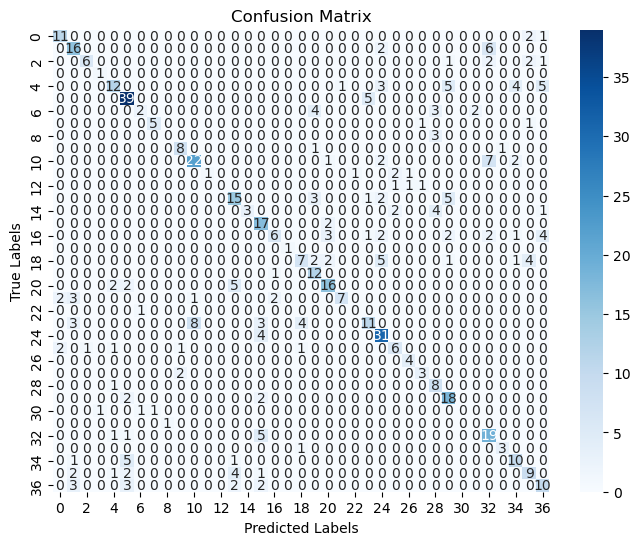

In [46]:
# Import necessary metrics and plotting libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict on test data
test_predictions = logreg.predict(x_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions, average='weighted')
recall = recall_score(y_test, test_predictions, average='weighted')
f1 = f1_score(y_test, test_predictions, average='weighted')

# Print results
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")

# Plotting the confusion matrix
cm = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
